In [1]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import normalize

In [2]:
df = pd.read_csv('data.csv')
print(df.shape)

(78682, 21)


In [3]:
# Params
correlation_thresholds = [1.0, 0.9999, 0.9995, 0.999, 0.99, 0.95, 0.9, 0.8]
explanatory_threshold = 0.9

In [4]:
df.head()

,company_name,status_label,year,X1,X2,X3,X4,X5,X6,X7,...,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18
0,C_1,alive,1999,511.267,833.107,18.373,89.031,336.018,35.163,128.348,...,1024.333,740.998,180.447,70.658,191.226,163.816,201.026,1024.333,401.483,935.302
1,C_1,alive,2000,485.856,713.811,18.577,64.367,320.590,18.531,115.187,...,874.255,701.854,179.987,45.790,160.444,125.392,204.065,874.255,361.642,809.888
2,C_1,alive,2001,436.656,526.477,22.496,27.207,286.588,-58.939,77.528,...,638.721,710.199,217.699,4.711,112.244,150.464,139.603,638.721,399.964,611.514
3,C_1,alive,2002,396.412,496.747,27.172,30.745,259.954,-12.410,66.322,...,606.337,686.621,164.658,3.573,109.590,203.575,124.106,606.337,391.633,575.592
4,C_1,alive,2003,432.204,523.302,26.680,47.491,247.245,3.504,104.661,...,651.958,709.292,248.666,20.811,128.656,131.261,131.884,651.958,407.608,604.467


In [5]:
df.describe()

,year,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18
count,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000,7.868200e+04,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000
mean,2007.506317,880.362485,1594.529029,121.234256,376.759424,201.605717,129.382453,286.832743,3.414355e+03,2364.019706,2867.110620,722.483710,255.525035,769.490783,610.072255,532.467069,2364.019706,1773.563963,1987.260307
std,5.742768,3928.564794,8930.484664,652.376804,2012.023142,1060.766096,1265.532022,1335.978571,1.841410e+04,11950.068842,12917.944421,3242.170946,1494.643534,3774.703114,2938.387443,6369.159440,11950.068842,8053.684902,10419.629038
min,1999.000000,-7.760000,-366.645000,0.000000,-21913.000000,0.000000,-98696.000000,-0.006000,1.000000e-04,-1964.999000,0.001000,-0.023000,-25913.000000,-21536.000000,0.001000,-102362.000000,-1964.999000,0.001000,-317.197000
25%,2002.000000,18.924000,17.038250,1.192000,-0.811000,0.000000,-7.415750,3.281250,3.498000e+01,27.548500,37.363500,0.000000,-2.787000,8.521250,8.889250,-68.282750,27.548500,13.486000,32.872500
50%,2007.000000,100.449500,103.661000,7.929500,15.034500,7.023000,1.616000,22.820000,2.275118e+02,186.598500,213.203500,7.593500,6.518000,63.581500,43.333000,-1.131000,186.598500,81.988000,168.912000
75%,2012.000000,431.526750,634.548000,47.971750,139.655250,74.747250,40.144250,131.580500,1.244890e+03,1046.402500,1171.364750,248.760750,87.599000,344.074250,222.817000,146.070000,1046.402500,629.975000,875.522250
max,2018.000000,169662.000000,374623.000000,28430.000000,81730.000000,62567.000000,104821.000000,65812.000000,1.073391e+06,511729.000000,531864.000000,166250.000000,71230.000000,137106.000000,116866.000000,402089.000000,511729.000000,337980.000000,481580.000000


In [6]:
# Checking for null values in the dataset
nullsum = sum(df.isna().sum())
print(df.isna().sum())
print('-------------------------------------------------------------')
if nullsum == 0:
    print('No null values found.')
else:
    print('null values have been found.')
    df.dropna()
    if nullsum == 0:
        print('Rows with null values have been removed.')


company_name    0
status_label    0
year            0
X1              0
X2              0
X3              0
X4              0
X5              0
X6              0
X7              0
X8              0
X9              0
X10             0
X11             0
X12             0
X13             0
X14             0
X15             0
X16             0
X17             0
X18             0
dtype: int64
-------------------------------------------------------------
No null values found.


In [7]:
# Checking datatypes
print(df.dtypes)
nonintfloat_flag = 0
for type in df.dtypes:
    if type not in ['int64', 'float64', 'object']:
        print('Further handling for: ' + str(type) + ', ' + str(type(type)))
        nonintfloat_flag = 1
if nonintfloat_flag == 0:
    print('All features are int or float or object.')


company_name     object
status_label     object
year              int64
X1              float64
X2              float64
X3              float64
X4              float64
X5              float64
X6              float64
X7              float64
X8              float64
X9              float64
X10             float64
X11             float64
X12             float64
X13             float64
X14             float64
X15             float64
X16             float64
X17             float64
X18             float64
dtype: object


In [8]:
# Determining if the classification problem is binary.
unique_values = df['status_label'].unique()
print('Unique values are: ' + str(unique_values[0]) + ', ' + str(unique_values[1]))
if len(unique_values) == 2:
    print('The classification problem is binary.')

Unique values are: alive, failed
The classification problem is binary.


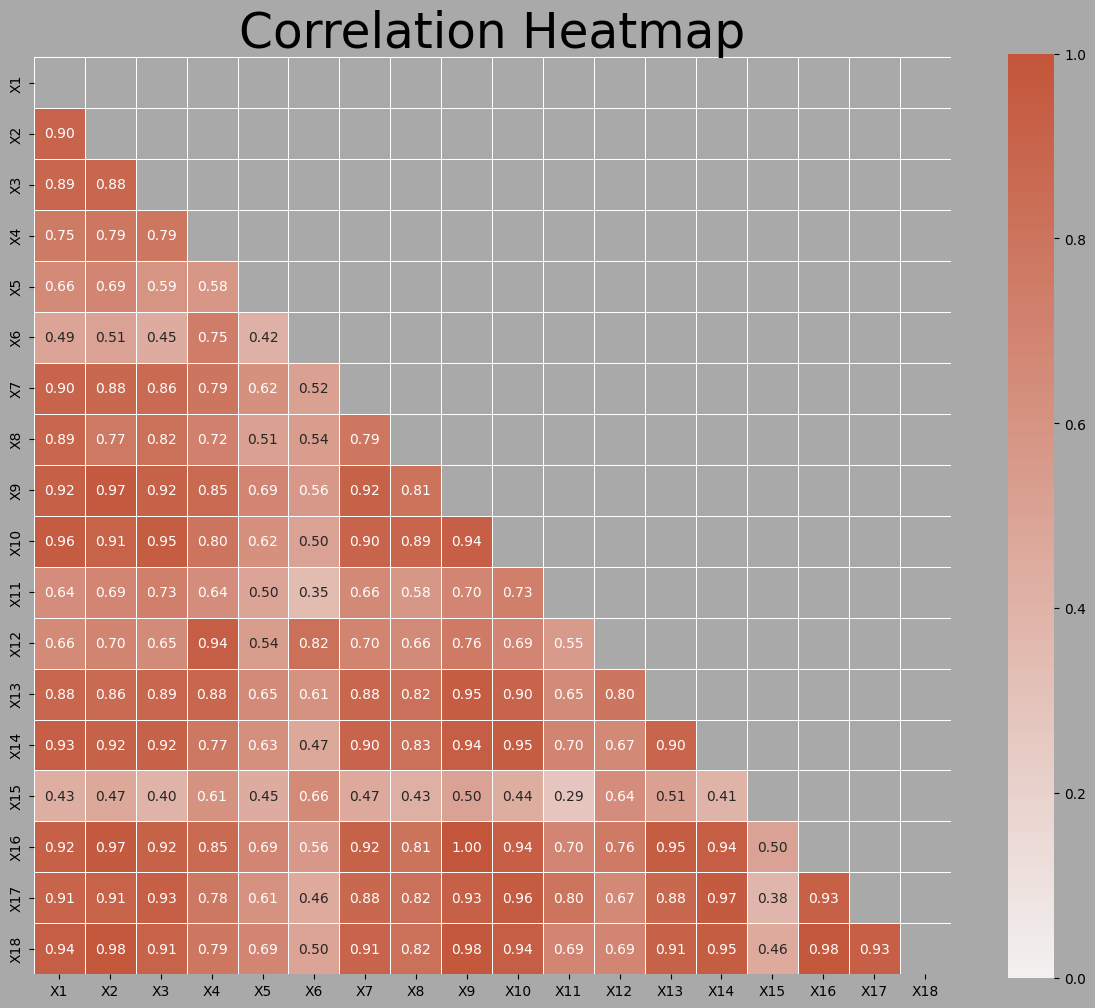

+0.90 : X2 correlates to X1
+0.89 : X3 correlates to X1
+0.88 : X3 correlates to X2
+0.75 : X4 correlates to X1
+0.79 : X4 correlates to X2
+0.79 : X4 correlates to X3
+0.66 : X5 correlates to X1
+0.69 : X5 correlates to X2
+0.59 : X5 correlates to X3
+0.58 : X5 correlates to X4
+0.49 : X6 correlates to X1
+0.51 : X6 correlates to X2
+0.45 : X6 correlates to X3
+0.75 : X6 correlates to X4
+0.42 : X6 correlates to X5
+0.90 : X7 correlates to X1
+0.88 : X7 correlates to X2
+0.86 : X7 correlates to X3
+0.79 : X7 correlates to X4
+0.62 : X7 correlates to X5
+0.52 : X7 correlates to X6
+0.89 : X8 correlates to X1
+0.77 : X8 correlates to X2
+0.82 : X8 correlates to X3
+0.72 : X8 correlates to X4
+0.51 : X8 correlates to X5
+0.54 : X8 correlates to X6
+0.79 : X8 correlates to X7
+0.92 : X9 correlates to X1
+0.97 : X9 correlates to X2
+0.92 : X9 correlates to X3
+0.85 : X9 correlates to X4
+0.69 : X9 correlates to X5
+0.56 : X9 correlates to X6
+0.92 : X9 correlates to X7
+0.81 : X9 correlate

In [9]:
# Choosing the right features: Examining correlation with Spearman to evaluate monotonic relationships between features
target = df['status_label']
features_full = df.drop(columns=['status_label', 'company_name', 'year']) # These features dont add any information to the target
f,ax = plt.subplots(figsize=(12, 10))

mat = features_full.corr('spearman')
mask = np.triu(np.ones_like(mat,dtype=bool))
cmap = sns.diverging_palette(230,20,as_cmap=True)

sns.heatmap(mat,mask=mask,cmap=cmap, annot=True, fmt=".2f" , vmin=0, vmax=1,center=0,square=True,linewidths=.5)

plt.title('Correlation Heatmap',fontsize=35)

plt.tight_layout()
plt.gcf().patch.set_facecolor('darkgrey')
plt.gca().set_facecolor('darkgrey')

plt.show()

for i in range(1, len(mat.columns)):
    for j in range(i):
        feature_a = mat.columns[i]
        feature_b = mat.columns[j]
        corr_value = mat.iloc[i, j]
            
        print(f"{corr_value:+.2f} : {feature_a} correlates to {feature_b}")

In [10]:
# Dropping highly correlated features based on their pairwise MI-Score
mi = mutual_info_classif(features_full, target, random_state=0)
mi_norm = normalize(mi.reshape(1, -1), norm='l1').flatten()
mi_scores = pd.Series(mi_norm, index=features_full.columns)  # |correlation| > threshold

upper = mat.where(np.triu(np.ones(mat.shape), k=1).astype(bool))

for threshold in correlation_thresholds:
    _dropped = set()
    for col in upper.columns:
        for row in upper.index:
            corr_value = upper.loc[row, col]
        
            if abs(corr_value) > threshold:
                # Ensure that column names align with MI scores
                if col in mi_scores and row in mi_scores:
                    if mi_scores[col] < mi_scores[row]:
                        _dropped.add(col)
                    else:
                        _dropped.add(row)

    # Drop the identified columns
    _features = features_full.drop(columns=_dropped)

    mi_reduced_scores = pd.Series(mi_scores, index=_features.columns)
    red_contribution = mi_reduced_scores.sum()
    if red_contribution < explanatory_threshold: # 0.9 : Losing 10% of explanatory power is tolerated
        break

    features = _features
    dropped = _dropped
    print('Contribution (Total MI) for ' + str(features.shape[1]) + ' features with correlation threshold ' + str(threshold) + ': ' + str(red_contribution))
    print('Dropped Features:')
    print(dropped)

Contribution (Total MI) for 18 features with correlation threshold 1.0: 0.9999999999999999
Dropped Features:
set()
Contribution (Total MI) for 17 features with correlation threshold 0.9999: 0.9426486101780095
Dropped Features:
{'X16'}
Contribution (Total MI) for 17 features with correlation threshold 0.9995: 0.9426486101780095
Dropped Features:
{'X16'}
Contribution (Total MI) for 17 features with correlation threshold 0.999: 0.9426486101780095
Dropped Features:
{'X16'}
Contribution (Total MI) for 17 features with correlation threshold 0.99: 0.9426486101780095
Dropped Features:
{'X16'}


In [11]:
# A higher threshold results in more features and more explanatory power
# A lower threshold results in less features and less explanatory power
# To maintain 90% of mutual information, 17 features need to be kept
# X9 and X16 have a correlation of 1
# X16 is dropped, because it has a lower MI score with the target

In [12]:
print(str(features_full.shape[1]) + " : Total features")
print(str(len(dropped)) + " : Dropped features based on correlation and lower MI score.")
print("--------------------------------------------------------------")
print(str(features.shape[1]) + " : Active features")

18 : Total features
1 : Dropped features based on correlation and lower MI score.
--------------------------------------------------------------
17 : Active features
